# Extracción de características

La primera técnica que vamos a ver para la reducción de la información que pasamos a nuestro futuro proceso de aprendizaje es la extracción de características. Se trata de generar un número menor de nuevas características a partir de las que tenemos.


## Análisis de componentes principales

Normalmente conocida por sus siglas en inglés, PCA (*Principal Component Analysis*), es probablemente la técnica de extracción de características más conocida. 

*PCA* trabaja sobre datos continuos. Así que debemos haber convertido previamente todas las características a valores continuos. 

*PCA* supone relaciones lineales entre las características por lo que puede no ser adecuada en algunos problemas sin aplicar transformaciones previas. Los algoritmos de aprendizaje basados en máquinas de vectores soporte, que se verán en otras asignaturas, hacen uso de esas transformaciones para funcionar eficazmente en muchos conjuntos de datos.


In [105]:
import numpy as np
import pandas as pd

Vamos a trabajar con un conjunto de datos pequeño inventado para ver los valores en el proceso. Por conveniencia vamos a separarlo en dos partes: X representa los vectores de características de las variables independientes e Y que representa la variable dependiente. 

*PCA* trabaja sólo sobre las características, ignorando la variable dependiente. Por tanto, es lo que llamaremos una técnica no supervisada (se verá en posteriores asignaturas). Lo que estamos aplicando es una especie de técnica de compresión (con perdida) de los datos.

In [106]:
tabla = pd.DataFrame(
    {'x1' : [0.1, 0.3, 0.5, 0.8, 1.9],
     'x2' : [0.0, 0.5, 1.0, 1.5, 2.0],
     'y'  : ['A', 'A', 'B', 'B', 'B']
})
x = np.array( tabla.loc[:,['x1', 'x2']] )
y = np.array( tabla.loc[:,['y']] )

A continuación lo representamos gráficamente. Observamos que hay bastante relación entre ambas variables (a menor x1, menor $x_2$ y viceversa). Esta es la relación que queremos capturar para reducir a menos características. 

Hemos representado las clases de la variable dependiente (A y B) como referencia de ejemplo de lo que un futuro algoritimo de aprendizaje tendrá que aprender. De esta forma vemos que la clase de objetos con valores pequeños de $x_1$ y $x_2$ es A y la de los que tienen valores grandes B. *PCA* ignora esto.

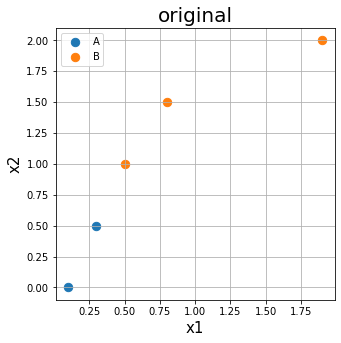

In [107]:
from matplotlib import pyplot
fig = pyplot.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x1', fontsize = 15)
ax.set_ylabel('x2', fontsize = 15)
ax.set_title('original', fontsize = 20)
objetivos = ['A', 'B']
colores = ['r', 'b']
for obj in objetivos:
    seleccionados = np.array(y == obj)[:,0]
    ax.scatter(x[seleccionados, 0], #x1
               x[seleccionados, 1], #x2
               s=70)
ax.legend(objetivos)
ax.grid()

El análisis de componentes principales se hace sobre las matrices de covarianza. Por esta razón, si una característica tuviese valores en el rango de los miles se consideraría mucho mas importante que una variable cuyos valores están en el rango de las decenas. Normalmente no deseamos esto. Para hacer que *PCA* sea independiente de las unidades en que se midan las propiedades (por ejemplo, metros o kilometros) y, en general, independiente del rango en el que las variables tomen valores, lo habitual es normalizar los valores (vimos como hacerlo en el tema 2.1):

In [108]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit_transform(x)
x

array([[-0.97835132, -1.41421356],
       [-0.66275412, -0.70710678],
       [-0.34715692,  0.        ],
       [ 0.12623888,  0.70710678],
       [ 1.86202349,  1.41421356]])

La forma es la misma pero cambiando los valores de las variables. Veamos la gráfica.

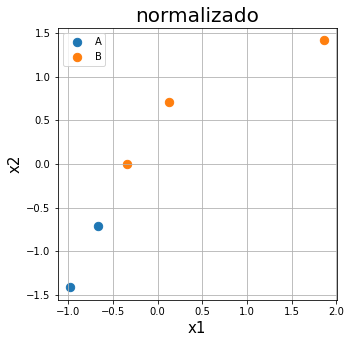

In [109]:
fig = pyplot.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x1', fontsize = 15)
ax.set_ylabel('x2', fontsize = 15)
ax.set_title('normalizado', fontsize = 20)
objetivos = ['A', 'B']
colores = ['r', 'b']
for obj in objetivos:
    seleccionados = np.array(y == obj)[:,0]
    ax.scatter(x[seleccionados, 0], #x1
               x[seleccionados, 1], #x2
               s=70)
ax.legend(objetivos)
ax.grid()

Podemos aplicar el análisis de componentes principales (*PCA*) usando la clase `PCA` del módulo `decomposition` de sklearn.

In [110]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca.fit(x)

PCA(n_components=1)

Podemos ver los componentes calculados en el siguiente atributo del objeto `pca` creado. En este caso sólo hay un componente (porque pusimos `n_components=1`), que tiene los valores de los pesos asignados a las dos variables originales.

In [111]:
pca.components_

array([[0.70710678, 0.70710678]])

De esta forma, podemos transformar los datos originales, para que tengan una única variable que retenga gran parte de la información de las dos variables, multiplicando la matriz de datos original por los componentes:

In [112]:
x @ pca.components_.T

array([[-1.69179886],
       [-0.96863793],
       [-0.24547701],
       [ 0.58926437],
       [ 2.31664944]])

Podemos ver el ratio de la varianza que se conserva de los datos originales en el siguiente atributo:

In [113]:
pca.explained_variance_ratio_


array([0.95747989])

En vez de hacer el `.fit(x)` y luego multiplicar nosotros por los pesos, se puede hacer directamente llamando a `fit_transform`. (Antes lo hemos hecho por pasos para ilustrar el proceso y comprobar ahora que el resultado es el mismo.)

In [114]:
xp = pca.fit_transform(x)
xp

array([[-1.69179886],
       [-0.96863793],
       [-0.24547701],
       [ 0.58926437],
       [ 2.31664944]])

De esta forma, hemos reducido la dimensión de los datos de dos a una sola variable. Podemos ver en la representación de los datos siguiente, que seguimos pudiendo diferenciar fácilmente los objetos de clase A frente a los de clase B usando la nueva variable `xp`.

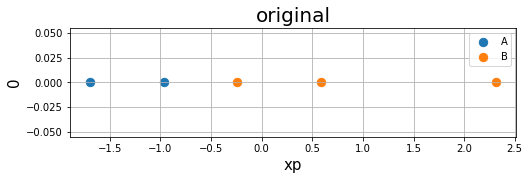

In [115]:
fig = pyplot.figure(figsize = (8,2))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('xp', fontsize = 15)
ax.set_ylabel('0', fontsize = 15)
ax.set_title('original', fontsize = 20)
objetivos = ['A', 'B']
for obj in objetivos:
    seleccionados = np.array(y == obj)[:,0]
    ax.scatter(xp[seleccionados, 0],
               np.zeros([sum(seleccionados)]),
               s=70)
ax.legend(objetivos)
ax.grid()

Podemos aplicar esto sobre datos con más dimensiones para ayudarnos a visualizarlo [1]. Por ejemplo, es dificil representar un problema con cuatro dimensiones pero podemos ver como queda si lo reducimos a dos.

In [116]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                   names=['sepal length','sepal width','petal length','petal width','target'])
iris

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


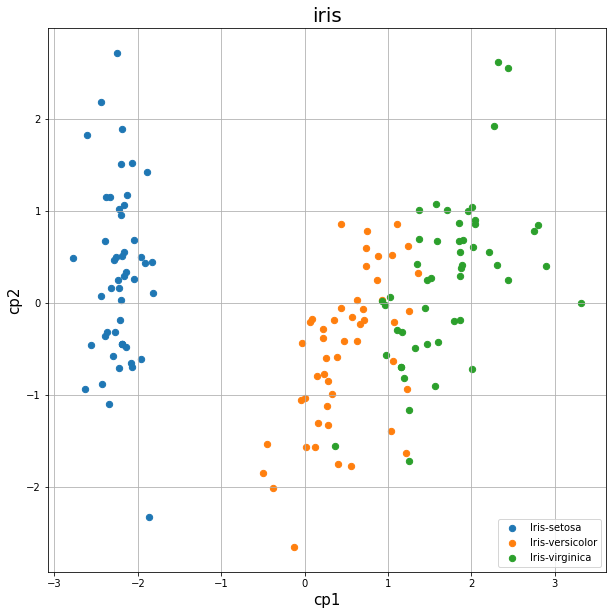

In [117]:
# Convertir a ndarray y normalizar
caracteristicas = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = iris.loc[:, caracteristicas].values
y = iris.loc[:,['target']].values
x = preprocessing.StandardScaler().fit_transform(x)

# Componentes principales
pca = decomposition.PCA(n_components=2)
xpca = pca.fit_transform(x)

# Gráfica
fig = pyplot.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('cp1', fontsize = 15)
ax.set_ylabel('cp2', fontsize = 15)
ax.set_title('iris', fontsize = 20)
objetivos = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colores = ['r', 'g', 'b']
for obj, color in zip(objetivos, colores):
    seleccionados = np.array(y == obj)[:,0]
    ax.scatter(xpca[seleccionados, 0], xpca[seleccionados, 1], s=40)
ax.legend(objetivos, loc="lower right")
ax.grid()

Podemos ver como con dos componentes una de las clases se puede diferenciar muy bien, mientras que las otras dos no tanto. Podemos ver que la varianza explicada entre los dos componentes es muy alta (casi el 96%):

In [118]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

Podría ser que esa poca información perdida haga funcionar algo peor a un algoritmo de aprendizaje y, con problemas tan pequeños, quizá no merezca la pena esta reducción. Sin embargo, es muy útil en problemas más grandes. En la referencia [1], hay también un ejemplo de como se puede aplicar en el reconocimiento de digitos (un problema con 784 características) y en la referencia [2] de como puede resultar útil aplicado antes del aprendizaje con redes neuronales profundas.

**Ejercicio**: Aplica *PCA* a los datos sobre vino que vimos en el tema 1.3.

In [119]:
from sklearn.datasets import load_wine

wine_data = load_wine()

In [120]:
x = pd.DataFrame(wine_data["data"], columns=wine_data["feature_names"])

y = pd.DataFrame(wine_data["target"], columns=["class"])

x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [121]:
x = pd.DataFrame(preprocessing.StandardScaler().fit_transform(x), columns=wine_data["feature_names"])
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


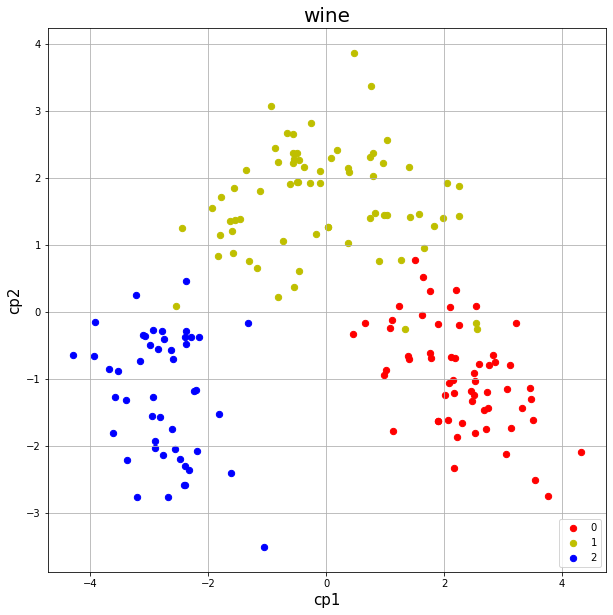

In [122]:
# Componentes principales
pca = decomposition.PCA(n_components=2)
xpca = pca.fit_transform(x)

fig = pyplot.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('cp1', fontsize = 15)
ax.set_ylabel('cp2', fontsize = 15)
ax.set_title('wine', fontsize = 20)
objetivos = [0, 1, 2]
colores = ['r', 'y', 'b']
for obj, c in zip(objetivos, colores):
    seleccionados = np.array(y == obj)[:,0]
    ax.scatter(xpca[seleccionados, 0], xpca[seleccionados, 1], s=40, color= c)
ax.legend(objetivos, loc="lower right")
ax.grid()

[1] PCA using Python (scikit-learn) https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

[2] Principal Component Analysis (PCA) in Python https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python